## 4.2 뉴스 기사 분류: 다중 분류 문제

### 4.2.1 로이터 데이터셋

>코드 4-11 로이터 데이터셋 로드하기

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
print(len(train_data), len(test_data))


8982 2246


In [3]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


### 4.2.2 데이터 준비

>코드 4-12 로이터 데이터셋을 텍스트로 디코딩하기

>코드 4-13 데이터 인코딩하기

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

레이블 > 벡터 변환
- 레이블의 리스트를 정수 텐서로 변환
- 원-핫 인코딩(one-hot encoding)=범주형 인코딩(categorical_encoding)

>코드 4-14 레이블 인코딩하기

In [5]:
def to_ont_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_ont_hot(train_labels)
y_test = to_ont_hot(test_labels)

케라스 내장 함수 사용

In [6]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 4.2.3 모델 구성

>코드 4-15 모델 정의하기

In [7]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

>코드 4-16 모델 컴파일하기

In [8]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 4.2.4 훈련 검증

>코드 4-17 검증 세트 준비하기

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

>코드 4-18 모델 훈련하기

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 2.5977 - accuracy: 0.5158 - val_loss: 1.6890 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.3936 - accuracy: 0.7097 - val_loss: 1.2975 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0423 - accuracy: 0.7736 - val_loss: 1.1403 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8289 - accuracy: 0.8221 - val_loss: 1.0382 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6648 - accuracy: 0.8573 - val_loss: 0.9709 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5370 - accuracy: 0.8898 - val_loss: 0.9333 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4318 - accuracy: 0.9102 - val_loss: 0.9302 - val_accuracy: 0.8040
Epoch 8/20
16

>코드 4-19 훈련과 검증 손실 그리기

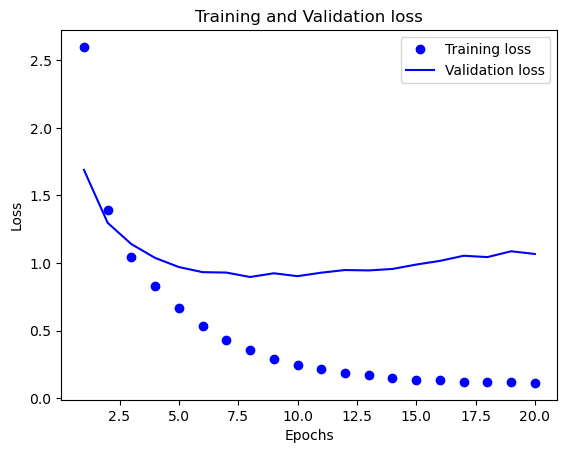

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

>코드 4-20 훈련과 검증 정확도 그리기

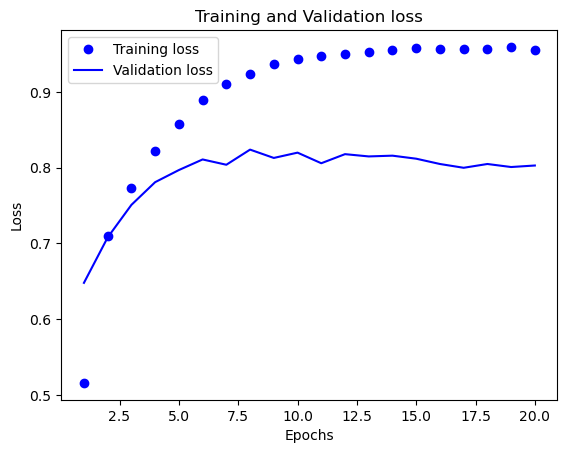

In [12]:
plt.clf()
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "bo", label="Training loss")
plt.plot(epochs, val_accuracy, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

>코드 4-21 모델을 처음부터 다시 훈련하기

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 15ms/step - loss: 2.5768 - accuracy: 0.5227
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.4337 - accuracy: 0.6882
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0516 - accuracy: 0.7746
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8230 - accuracy: 0.8251
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6524 - accuracy: 0.8656
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5198 - accuracy: 0.8899
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4192 - accuracy: 0.9124
Epoch 8/9
16/16 [==============================] - 0s 15ms/step - loss: 0.3441 - accuracy: 0.9271
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9748 - accuracy: 0.7894
[0.9747633934020996, 0.7894033789634705]


### 4.2.5 새로운 데이터에 대해 예측하기

In [14]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [15]:
predictions[0].shape

(46,)

In [16]:
np.sum(predictions[0])

1.0000001

In [17]:
np.argmax(predictions[0])

3

### 4.2.6 레이블과 손실을 다루는 다른 방법

### 4.2.7 충분히 큰 중간층을 두어야 하는 이유